In [188]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder 

In [189]:
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv
/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt
/kaggle/input/house-prices-advanced-regression-techniques/train.csv
/kaggle/input/house-prices-advanced-regression-techniques/test.csv


# ***LOADING THE DATASETS***

In [190]:
train = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/train.csv')
test = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/test.csv')
submit = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv')

# ***ANALYSIS AND CLEANING***

In [191]:
#summary of data
class summary:
    def __init__(self):
        pass
    def data_summ(self):
        duplicate = train.duplicated().sum().any()
        if duplicate == 'True':
            train.drop_duplicates(inplace=True)
            train.reset_index(drop=True)
        null = train.isna().sum().any()
        total_missing = train.isnull().sum().sum()
        shapes = train.shape
        return f"Duplicate: {duplicate}\nNull_values: {null}\nTotal_missing: {total_missing}\nShapes: {shapes}"

In [192]:
summ = summary()
print(summ.data_summ())

Duplicate: False
Null_values: True
Total_missing: 7829
Shapes: (1460, 81)


> as we can see our dataset contains a lot of missing values

In [193]:
train[:5]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [194]:
test[-5:]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal
1458,2919,60,RL,74.0,9627,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,11,2006,WD,Normal


In [195]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [196]:
#find missing values in the dataset
def find_missing_values(train):
    missing_values = {}
    train_rows = len(train)
    for column in train.columns:
        total_column_values = train[column].value_counts().sum()
        missing_values[column] = train_rows - total_column_values
    return missing_values

find_missing_values(train), find_missing_values(test)

({'Id': 0,
  'MSSubClass': 0,
  'MSZoning': 0,
  'LotFrontage': 259,
  'LotArea': 0,
  'Street': 0,
  'Alley': 1369,
  'LotShape': 0,
  'LandContour': 0,
  'Utilities': 0,
  'LotConfig': 0,
  'LandSlope': 0,
  'Neighborhood': 0,
  'Condition1': 0,
  'Condition2': 0,
  'BldgType': 0,
  'HouseStyle': 0,
  'OverallQual': 0,
  'OverallCond': 0,
  'YearBuilt': 0,
  'YearRemodAdd': 0,
  'RoofStyle': 0,
  'RoofMatl': 0,
  'Exterior1st': 0,
  'Exterior2nd': 0,
  'MasVnrType': 872,
  'MasVnrArea': 8,
  'ExterQual': 0,
  'ExterCond': 0,
  'Foundation': 0,
  'BsmtQual': 37,
  'BsmtCond': 37,
  'BsmtExposure': 38,
  'BsmtFinType1': 37,
  'BsmtFinSF1': 0,
  'BsmtFinType2': 38,
  'BsmtFinSF2': 0,
  'BsmtUnfSF': 0,
  'TotalBsmtSF': 0,
  'Heating': 0,
  'HeatingQC': 0,
  'CentralAir': 0,
  'Electrical': 1,
  '1stFlrSF': 0,
  '2ndFlrSF': 0,
  'LowQualFinSF': 0,
  'GrLivArea': 0,
  'BsmtFullBath': 0,
  'BsmtHalfBath': 0,
  'FullBath': 0,
  'HalfBath': 0,
  'BedroomAbvGr': 0,
  'KitchenAbvGr': 0,
  'Kitc

In [197]:
train.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Id,1460.0,730.500000,421.610009,1.0,365.75,730.5,1095.25,1460.0
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0


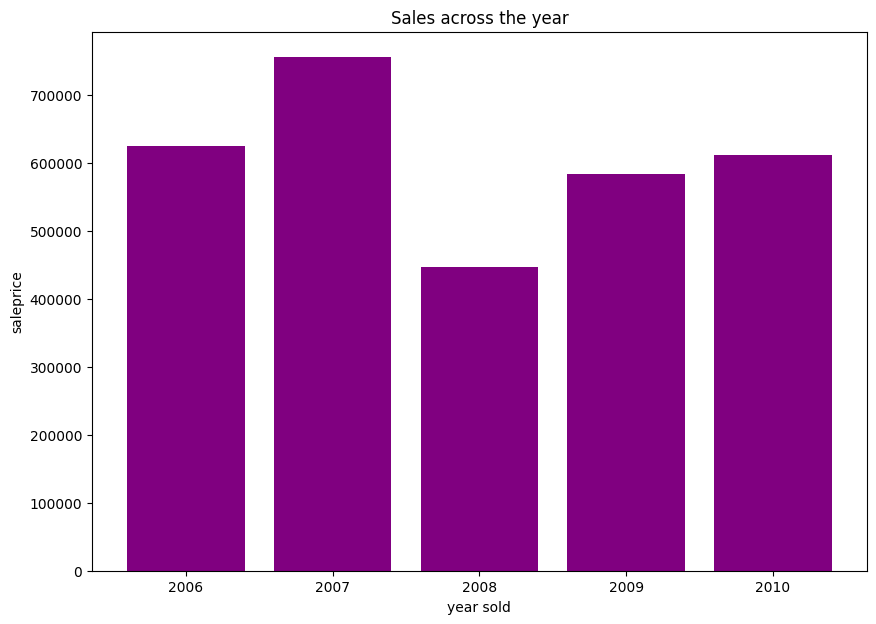

In [198]:
plt.figure(figsize=(10, 7))
plt.bar(np.array(train['YrSold']), np.array(train['SalePrice']), color='purple')
plt.title('Sales across the year')
plt.xlabel('year sold')
plt.ylabel('saleprice')
plt.show()

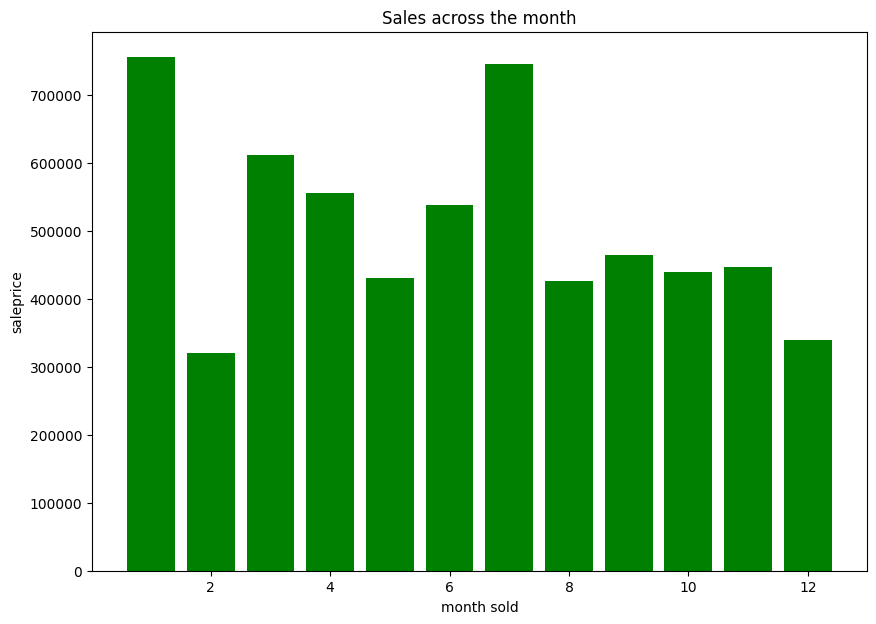

In [199]:
plt.figure(figsize=(10, 7))
plt.bar(np.array(train['MoSold']), np.array(train['SalePrice']), color='green')
plt.title('Sales across the month')
plt.xlabel('month sold')
plt.ylabel('saleprice')
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='SalePrice', ylabel='Density'>

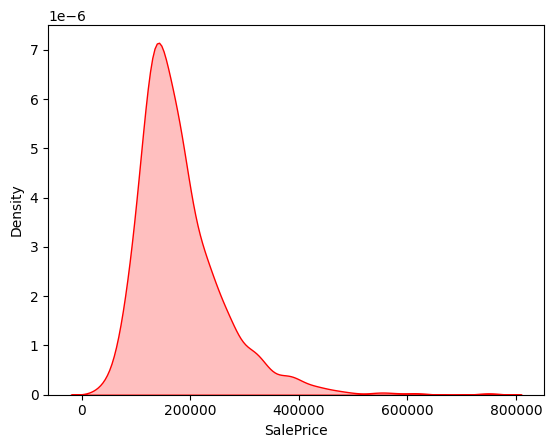

In [200]:
sns.kdeplot(train, x='SalePrice', fill=True, color='red')

In [201]:
#dropping columns with high missing values
def drop_cols(train):
    cols = ['Id', 'LotFrontage', 'Alley', 'MasVnrArea', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature']
    return train.drop(train[cols], axis=1, inplace=True)
    
drop_cols(train), drop_cols(test)

(None, None)

In [202]:
train.columns

Index(['MSSubClass', 'MSZoning', 'LotArea', 'Street', 'LotShape',
       'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood',
       'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
    

In [203]:
def fill_missing(train):
    #filling numerical columns
    train.fillna(train.select_dtypes(include='number').mean().iloc[0], inplace=True)
    #filling categorical columns
    train.fillna(train.select_dtypes(include='object').mode().iloc[0], inplace=True)

fill_missing(train)

In [204]:
train.isna().sum().sum()#checking the dataset

0

In [205]:
#calling the fill_missing function on the test dataset
fill_missing(test)

In [206]:
train.head(15)

,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,...,0,0,0,0,0,12,2008,WD,Normal,250000
5,50,RL,14115,Pave,IR1,Lvl,AllPub,Inside,Gtl,Mitchel,...,0,320,0,0,700,10,2009,WD,Normal,143000
6,20,RL,10084,Pave,Reg,Lvl,AllPub,Inside,Gtl,Somerst,...,0,0,0,0,0,8,2007,WD,Normal,307000
7,60,RL,10382,Pave,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,...,228,0,0,0,350,11,2009,WD,Normal,200000
8,50,RM,6120,Pave,Reg,Lvl,AllPub,Inside,Gtl,OldTown,...,205,0,0,0,0,4,2008,WD,Abnorml,129900
9,190,RL,7420,Pave,Reg,Lvl,AllPub,Corner,Gtl,BrkSide,...,0,0,0,0,0,1,2008,WD,Normal,118000


# ***ENCODING, SPLITTING***

In [207]:
def convert_to_str(train):
    for val in train.columns:
        if (train[val].dtype == 'object'):
            train[val] = train[val].astype(str)
        if (train[val].dtype == ['float64', 'int64']):
            train[val] == train[val].astype('float', 'int')
                                 
    return train
convert_to_str(train)

,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,...,0,0,0,0,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,7917,Pave,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,...,0,0,0,0,0,8,2007,WD,Normal,175000
1456,20,RL,13175,Pave,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,...,0,0,0,0,0,2,2010,WD,Normal,210000
1457,70,RL,9042,Pave,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,...,0,0,0,0,2500,5,2010,WD,Normal,266500
1458,20,RL,9717,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,...,112,0,0,0,0,4,2010,WD,Normal,142125


In [208]:
#encoding categorical data
def encode(train):
    le = LabelEncoder()
    for col in train.columns:
        if (train[col].dtype == 'object'):
            train[col] = le.fit_transform(train[col])
    return train

encode(train)

,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,3,8450,1,3,3,0,4,0,5,...,0,0,0,0,0,2,2008,8,4,208500
1,20,3,9600,1,3,3,0,2,0,24,...,0,0,0,0,0,5,2007,8,4,181500
2,60,3,11250,1,0,3,0,4,0,5,...,0,0,0,0,0,9,2008,8,4,223500
3,70,3,9550,1,0,3,0,0,0,6,...,272,0,0,0,0,2,2006,8,0,140000
4,60,3,14260,1,0,3,0,2,0,15,...,0,0,0,0,0,12,2008,8,4,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,3,7917,1,3,3,0,4,0,8,...,0,0,0,0,0,8,2007,8,4,175000
1456,20,3,13175,1,3,3,0,4,0,14,...,0,0,0,0,0,2,2010,8,4,210000
1457,70,3,9042,1,3,3,0,4,0,6,...,0,0,0,0,2500,5,2010,8,4,266500
1458,20,3,9717,1,3,3,0,4,0,12,...,112,0,0,0,0,4,2010,8,4,142125


In [209]:
# features
X = train.drop('SalePrice', axis=1)
y = train.pop('SalePrice')

In [210]:
X.head(2)

,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,3,8450,1,3,3,0,4,0,5,...,61,0,0,0,0,0,2,2008,8,4
1,20,3,9600,1,3,3,0,2,0,24,...,0,0,0,0,0,0,5,2007,8,4


In [211]:
y.tail(3)

1457    266500
1458    142125
1459    147500
Name: SalePrice, dtype: int64

In [212]:
convert_to_str(test)

,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,20,RH,11622,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,...,0,0,0,120,0,0,6,2010,WD,Normal
1,20,RL,14267,Pave,IR1,Lvl,AllPub,Corner,Gtl,NAmes,...,36,0,0,0,0,12500,6,2010,WD,Normal
2,60,RL,13830,Pave,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,...,34,0,0,0,0,0,3,2010,WD,Normal
3,60,RL,9978,Pave,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,...,36,0,0,0,0,0,6,2010,WD,Normal
4,120,RL,5005,Pave,IR1,HLS,AllPub,Inside,Gtl,StoneBr,...,82,0,0,144,0,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,160,RM,1936,Pave,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,...,0,0,0,0,0,0,6,2006,WD,Normal
1455,160,RM,1894,Pave,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,...,24,0,0,0,0,0,4,2006,WD,Abnorml
1456,20,RL,20000,Pave,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,...,0,0,0,0,0,0,9,2006,WD,Abnorml
1457,85,RL,10441,Pave,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,...,32,0,0,0,0,700,7,2006,WD,Normal


In [213]:
encode(test)

,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,20,3,11622,1,3,3,1,4,0,12,...,0,0,0,120,0,0,6,2010,9,4
1,20,4,14267,1,0,3,1,0,0,12,...,36,0,0,0,0,12500,6,2010,9,4
2,60,4,13830,1,0,3,1,4,0,8,...,34,0,0,0,0,0,3,2010,9,4
3,60,4,9978,1,0,3,1,4,0,8,...,36,0,0,0,0,0,6,2010,9,4
4,120,4,5005,1,0,1,1,4,0,22,...,82,0,0,144,0,0,1,2010,9,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,160,5,1936,1,3,3,1,4,0,10,...,0,0,0,0,0,0,6,2006,9,4
1455,160,5,1894,1,3,3,1,4,0,10,...,24,0,0,0,0,0,4,2006,9,0
1456,20,4,20000,1,3,3,1,4,0,11,...,0,0,0,0,0,0,9,2006,9,0
1457,85,4,10441,1,3,3,1,4,0,11,...,32,0,0,0,0,700,7,2006,9,4


In [214]:
X_train, X_val, y_train, y_val = train_test_split(X, y, random_state=2)

In [215]:
X_train.shape, y_train.shape, X_val.shape, y_val.shape

((1095, 72), (1095,), (365, 72), (365,))

# ***MODELLING***

In [216]:
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor, plot_tree  
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

base_estimator = DecisionTreeRegressor(max_depth=4)
b_model = BaggingRegressor(base_estimator=base_estimator, n_estimators=10, random_state=2)
b_model.fit(X_train, y_train)

/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


BaggingRegressor(base_estimator=DecisionTreeRegressor(max_depth=4),
                 random_state=2)

In [217]:
b_pred = b_model.predict(X_val)
loss = np.sqrt(mean_squared_error(y_val, b_pred))
accuracy = r2_score(y_val, b_pred)
print(f"loss: {loss}\naccuracy: {accuracy}")

loss: 42930.18840341658
accuracy: 0.7396081384229269


In [218]:
import xgboost as xgb


params = {
    'max_depth' : 9,
    'learning_rate' : 0.2,
    'random_state' : 2,
    'n_estimators' : 100,
    'n_jobs' : -1
    
}

x_model = xgb.XGBRegressor(**params)
x_model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.2, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=9, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=-1,
             num_parallel_tree=None, random_state=2, ...)

In [219]:
x_pred = x_model.predict(X_val)
loss2 = np.sqrt(mean_squared_error(y_val, x_pred))
accuracy2 = r2_score(y_val, x_pred)
print(f"loss: {loss2}\naccuracy: {accuracy2}")

loss: 42058.53714709663
accuracy: 0.7500747448749587


In [220]:
from sklearn.ensemble import RandomForestRegressor

f_model = RandomForestRegressor(n_estimators=100, random_state=2, min_samples_split = 2, n_jobs = -1)
f_model.fit(X_train, y_train)

RandomForestRegressor(n_jobs=-1, random_state=2)

In [222]:
f_pred = f_model.predict(X_val)
loss3 = np.sqrt(mean_squared_error(y_val, f_pred))
accuracy3 = r2_score(y_val, f_pred)
print(f"loss: {loss3}\naccuracy: {accuracy3}")

loss: 40665.73732661652
accuracy: 0.766353586073996


**FOREST WINS**

# ***PREDICTIONS ON TEST DATA***

In [223]:
test_pred = f_model.predict(test)
test_pred

array([123613.58, 153963.82, 178305.4 , ..., 152428.85, 123545.5 ,
       227858.5 ])

In [224]:
submission = submit
submission.head(2)

,Id,SalePrice
0,1461,169277.052498
1,1462,187758.393989


In [225]:
submission['SalePrice'] = test_pred
submission.head(10)

,Id,SalePrice
0,1461,123613.58
1,1462,153963.82
2,1463,178305.40
3,1464,178305.85
4,1465,198769.76
5,1466,175483.20
6,1467,163080.64
7,1468,169215.70
8,1469,182213.13
9,1470,121397.19


In [226]:
submission.to_csv("submission.csv", index=False)